In [1]:
#import sqlalchemy
import sqlalchemy as sqa
from sqlalchemy.orm import declarative_base
from sqlalchemy import func
from sqlalchemy import ForeignKey
from sqlalchemy.orm import relationship
from sqlalchemy import case
from sqlalchemy import desc

import timeit #for timing
import matplotlib.pyplot as plt
import numpy as np

from sqlalchemy.orm import sessionmaker

C:\Users\Raphael\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Raphael\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Raphael\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#creates engine to the database file
engine = sqa.create_engine("sqlite:///Data/movie.db")

In [3]:
#creates declarative base
Base = declarative_base()

In [4]:
#creates class for communicating with the movie table
class Movies(Base):
    __tablename__ = 'movies'
    
    id_movie = sqa.Column(sqa.Integer, primary_key=True)
    title_movie = sqa.Column(sqa.String)
    year_movie = sqa.Column(sqa.Integer)
    
    def __repr__(self):
        return "<Movie(id_movie='%i',title_movie='%s')>" % (self.id_movie, self.title_movie)

#creates class for communicating with the movie table
class Ratings(Base):
    __tablename__ = 'ratings'
    
    id_rating = sqa.Column(sqa.Integer, primary_key=True)
    id_movie = sqa.Column(sqa.Integer)
    id_user = sqa.Column(sqa.Integer)
    value_rating = sqa.Column(sqa.Float)
    timestamp_rating = sqa.Column(sqa.String)

    
    def __repr__(self):
        return "<Rating(id_rating='%i',id_movie='%i',id_user='%i',value_rating='%i',timestamp_rating='%s')>" % (self.id_rating,self.id_movie,self.id_user,self.value_rating, self.timestamp_rating)

#creates class for communicating with the movie table
class GenreList(Base):
    __tablename__ = 'genre_list'
    
    id_genre_item = sqa.Column(sqa.Integer, primary_key=True)
    id_movie = sqa.Column(sqa.Integer)
    name_genre = sqa.Column(sqa.String)
    
    
    def __repr__(self):
        return "<GenreList(id_genre_item='%i',id_movie='%i',name_genre='%s')>" % (self.id_genre_item,self.id_movie,self.id_user,self.name_genre)

    
#creates class temporary reference of average rating
class ReferenceRatings(Base):
    __tablename__ = 'reference_ratings'
    
    id_reference = sqa.Column(sqa.Integer, primary_key=True)
    average_rating = sqa.Column(sqa.Float)
    timestamp_update = sqa.Column(sqa.String)
    onestar_rating = sqa.Column(sqa.Integer)
    twostar_rating = sqa.Column(sqa.Integer)
    threestar_rating = sqa.Column(sqa.Integer)
    fourstar_rating = sqa.Column(sqa.Integer)
    fivestar_rating = sqa.Column(sqa.Integer)
    count_rating = sqa.Column(sqa.Integer)
    

    
    def __repr__(self):
        return "<Rating(id_movie='%i',average_rating='%i',timestamp_update='%s')>" % (self.id_reference,self.average_rating, self.timestamp_update)

class intersec_movies(Base):
    __tablename__ = 'intersec_movies'
    
    id_intersec = sqa.Column(sqa.Integer, primary_key=True, index=True)
    id_movieA = sqa.Column(sqa.Integer)
    id_movieB = sqa.Column(sqa.Integer)
    count_value = sqa.Column(sqa.Integer)
    
    def __repr__(self):
        return "<intersec_movies(id_moviAe='%i',id_moviAe='%i',count='%i')>" % (self.id_movieA,self.id_movieB, self.count_value)

class intersec_users(Base):
    __tablename__ = 'intersec_users'
    
    id_intersec_user = sqa.Column(sqa.Integer, primary_key=True, index=True)
    id_userA = sqa.Column(sqa.Integer)
    id_userB = sqa.Column(sqa.Integer)
    similarity_user = sqa.Column(sqa.Integer)
    
    def __repr__(self):
        return "<intersec_users(id_intersec_user='%i',id_userA='%i',id_userB='%i', count='%i')>" % (self.id_intersec_user,self.id_userA,self.id_userB, self.similarity_user)

class intersec_movies_2(Base):
    __tablename__ = 'intersec_movies_2'
    
    id_intersec_movie = sqa.Column(sqa.Integer, primary_key=True, index=True)
    id_movieA = sqa.Column(sqa.Integer, index=True)
    id_movieB = sqa.Column(sqa.Integer, index=True)
    similarity_movie = sqa.Column(sqa.Float)
    
    def __repr__(self):
        return "<intersec_movies(id_intersec_movie='%i',id_movieA='%i',id_movieB='%i', similarity='%i')>" % (self.id_intersec_movie,self.id_movieA,self.id_movieB, self.similarity_movie)

    
#relationships

#Ratings.movie = relationship("Movies", back_populates="ratings")
#Movies.ratings = relationship("Ratings", order_by=Ratings.id_rating, back_populates="movie")

In [5]:
#connects to the database
Session = sessionmaker(bind=engine)
session = Session()

In [6]:
# First networkx library is imported 
# along with matplotlib
import networkx as nx
import matplotlib.pyplot as plt
   
# Defining a Class
class GraphVisualization:
   
    def __init__(self):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
        self.visual = []
          
    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
          
    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()


In [56]:
G = nx.Graph()
edges = []
nodes = []

query = session.query(intersec_movies_2.id_movieA, intersec_movies_2.id_movieB, intersec_movies_2.similarity_movie).filter(intersec_movies_2.similarity_movie >= 0.25)
for q in query:
    edges.append([q[0], q[1], dict(weight=q[2])])
    
query = session.query(ReferenceRatings.id_reference, ReferenceRatings.count_rating, Movies.title_movie, GenreList.name_genre).filter(ReferenceRatings.count_rating > 100, Movies.id_movie==ReferenceRatings.id_reference, Movies.id_movie == GenreList.id_movie)
for q in query:
    nodes.append((q[0], dict(size=q[1], label=q[2], genre=q[3])))

In [57]:
help(G.add_nodes_from)

Help on method add_nodes_from in module networkx.classes.graph:

add_nodes_from(nodes_for_adding, **attr) method of networkx.classes.graph.Graph instance
    Add multiple nodes.
    
    Parameters
    ----------
    nodes_for_adding : iterable container
        A container of nodes (list, dict, set, etc.).
        OR
        A container of (node, attribute dict) tuples.
        Node attributes are updated using the attribute dict.
    attr : keyword arguments, optional (default= no attributes)
        Update attributes for all nodes in nodes.
        Node attributes specified in nodes as a tuple take
        precedence over attributes specified via keyword arguments.
    
    See Also
    --------
    add_node
    
    Examples
    --------
    >>> G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
    >>> G.add_nodes_from("Hello")
    >>> K3 = nx.Graph([(0, 1), (1, 2), (2, 0)])
    >>> G.add_nodes_from(K3)
    >>> sorted(G.nodes(), key=str)
    [0, 1, 2, 'H', 'e', 'l', 'o']


In [58]:
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [59]:
nx.write_gexf(G,'moviesBIG.gexf')

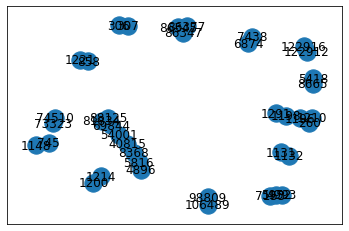

In [33]:
G.visualize()a